In [1]:
import functions_new_jit as func
import importlib
importlib.reload(func)

##########################################################################################################################################

import numpy as np
import numba
import matplotlib.pyplot as plt
import random as rd
from IPython.display import clear_output

In [2]:
%time _ = func.create_thresholds(100,25,11)

Wall time: 940 ms


In [3]:
%time _ = func.create_agents(100,25,11)

Wall time: 761 ms


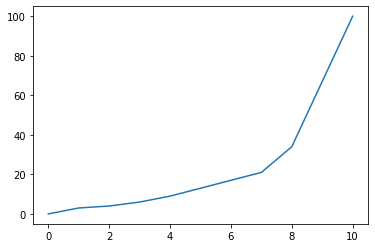

In [4]:
N = 100            # number of Agents
average = 25       # average value of the normal distribution
deviation = 12     # standard deviation of the normal distribution

thresholds = func.create_thresholds(N,average,deviation)
evolution = func.simulate_riot(thresholds)
plt.figure()
plt.plot(evolution)
plt.show()

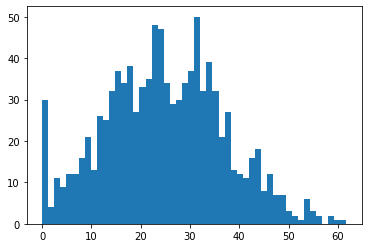

In [5]:
N=1000
average = 25
deviation = 12
thresholds = np.zeros(N)
    
# generating the values
for i in range(N):
    threshold = rd.gauss(average, deviation)     # generates a random value according with a normal distribution

    if threshold < 0:
        threshold = 0
    elif threshold > 100:
        threshold = 100

    thresholds[i] = threshold
    
plt.hist(thresholds,50)
plt.show()

In [6]:
# tornar o processo de " graficação" mais rápido com o @njit
@numba.njit
def graficar_simulate_riot(average_samples, deviations, simulations):
    
    heat_map = np.zeros((len(average_samples),len(deviations)))
    
    for k in averages_sample:

        for i in deviations:         # a set of simulations per standard deviation value
            average_size = 0

            for j in range(simulations):   # riot simulation
                thresholds = func.create_thresholds(N,int(k),int(i))
                riot = func.simulate_riot(thresholds)
                size = riot[-1]
                average_size += size

            average_size = average_size/simulations
            heat_map[i][k] = average_size

    return heat_map

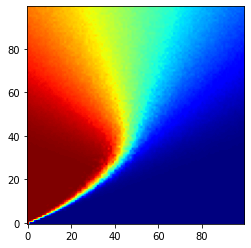

In [9]:
N = 100            # number of Agents

average_max = 100
deviation_max = 100
averages_sample = np.arange(0,average_max)  # average value of the normal distribution
deviations = np.arange(0,deviation_max)       # standard deviations of the normal distribution
simulations = 100                  # number of simulations per standard deviation value

heat_map = graficar_simulate_riot(averages_sample, deviations, simulations)

plt.figure()
plt.imshow(heat_map, origin="lower",cmap="jet")
#plt.savefig("Média e Desvio Padrão - Determinístico")
plt.show()